<a href="https://colab.research.google.com/github/vageeshmaiya/Pyramidal-Attention-Mechanism-For-Synthetic-Battery-Data-Generation-/blob/main/Pyramidal_Attention_Mechanism_For_Synthetic_Battery_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyramidal-Attention-Mechanism-For-Synthetic-Battery-Data-Generation

#### **Note**

Set the runtime to GPU before running the code.

##### **Steps to set the runtime to GPU**:
1. Click on the `Runtime` option displayed on the menu above.
2. Click on the `Change runtime type` option
3. Under `Hardware acclerators` choose GPU(if not already set) and click save.

### **1. Mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Changing Directory path**

##### **Steps To Follow**

1. Once the drive has been mounted go to the folder icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the `long_range_main.py` file.

4. Right click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the `long_range_main.py` file in the code below. 

6. The path of the folder in the code below is: `/content/drive/MyDrive/Pyraformer-master`

In [2]:
%cd /content/drive/MyDrive/Pyraformer-master
!ls

/content/drive/MyDrive/Pyraformer-master
'Copy of data_loader.py'   models		 requirements.txt
 data			   preprocess_elect.py	 results
 data_loader.py		   preprocess_flow.py	 scripts
 img			   preprocess_wind.py	 simulate_sin.py
 LEGAL.md		   __pycache__		 single_step_main.py
 LICENSE		   pyraformer		 utils
 long_range_main.py	   README.md


### **3. Installing Requirements**

Once the dependencies are installed restart the runtime

In [3]:
pip install -r requirements.txt

### **4. Installing other pre-requisites**

In [4]:
pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 49.0 MB/s eta 0:00:24tcmalloc: large alloc 1147494400 bytes == 0x39772000 @  0x7f88d32a7615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.6 MB/s eta 0:09:40tcmalloc: large alloc 1434370048 bytes == 0x7ddc8000 @  0x7f88d32a7615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.4 MB/s eta 0:07:46tcmalloc: large alloc 1792966656 bytes 

In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
def force_cudnn_initialization():
    s = 32
    dev = torch.device('cuda')
    torch.nn.functional.conv2d(torch.zeros(s, s, s, s, device=dev), torch.zeros(s, s, s, s, device=dev))

In [7]:
force_cudnn_initialization()

### **5. Running the main code**

In [8]:
!python -u long_range_main.py -data Battery -data_path new_data.csv -input_size 100 -predict_step 24 -n_head 6 -run_name new_data_trial_1_24

[Info] parameters: Namespace(CSCM='Bottleneck_Construct', batch_size=32, covariate_size=4, d_bottleneck=128, d_inner_hid=512, d_k=128, d_model=512, d_v=128, data='Battery', data_path='new_data.csv', dec_in=2, decoder='FC', dropout=0.05, embed_type='DataEmbedding', enc_in=2, epoch=4, eval=False, hard_sample_mining=False, inner_size=3, input_size=100, inverse=True, iter_num=2, lr=0.0001, lr_step=0.1, model='Pyraformer', n_head=6, n_layer=4, predict_step=24, pretrain=False, root_path='./data/datasets/', run_name='new_data_trial_1_24', seq_num=1, truncate=False, use_tvm=False, window_size=[4, 4, 4])
[Info] Number of parameters: 8837888
train 5682
test 1635
[ Epoch 1 ]
  - (Training) MSE:  0.54977elapse: 0.625 min
test shape:(1635, 24, 2)
Epoch 0, mse:0.08889410644769669, mae:0.20071648061275482, rmse:0.2981511354446411, mape:inf, mspe:inf
[ Epoch 2 ]
  - (Training) MSE:  0.22906elapse: 0.620 min
test shape:(1635, 24, 2)
Epoch 1, mse:0.06138443946838379, mae:0.15805761516094208, rmse:0.2477

### **6. Plotting the result**

##### **Steps to load the output prediction and ground truth files**

1. Once the main code is run a new folder named `results` will be created(if not present previously) in the same location where `long_range_main.py` script is present.

2. The output obtained on execution of the main code is stored in the `results` folder under the given `run_name`.

3. The model prediction is in the form of a `npy` file with the name `pred.npy` and the ground truth under the name of `true.npy`. 

4. Copy the path of the folder containing the obtained output files and paste it in the code below.

5. The path of the path of output pickel file considered below is : `/content/drive/MyDrive/Pyraformer-master/results/new_data_trial_1_24`

In [9]:
%cd /content/drive/MyDrive/Pyraformer-master/results/new_data_trial_1_24
!ls

/content/drive/MyDrive/Pyraformer-master/results/new_data_trial_1_24
pred.npy			    pyraformer_new_data_voltage_24.pdf
pyraformer_new_data_current_24.pdf  true.npy


In [10]:
# Importing Requirements for plotting
import numpy as np
import matplotlib.pyplot as plt


preds = np.load('pred.npy') # Predicted parameters
trues = np.load('true.npy') # Ground truth parameters

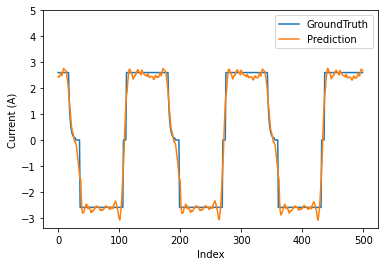

In [12]:
plt.figure()
# The below range plots the first 500 data points to get the whole plot use trues[:,1,-1] and preds[:,1,-1] 
# The prediction is multi variate. In order to get the prediction and ground truth values for other parameters change the value of the last dimension(i.e from -1 to -2 or -3 depending on the number of parameters)
plt.plot(trues[:500, 1,-1], label='GroundTruth') 
plt.plot(preds[:500, 1,-1], label='Prediction')
plt.yticks([-3,-2,-1,0,1,2,3,4,5]) # Y-axis markings (can be varied depending on the requirement)
plt.xlabel('Index')
plt.ylabel('Current (A)') # Can be changed depending on the parameter
plt.legend()
#plt.savefig("pyraformer_new_data_current_24.pdf",bbox_inches = "tight")
plt.show()

##### To obtain the path where the prediction plots are saved in drive run the codeline below

In [13]:
pwd

'/content/drive/MyDrive/Pyraformer-master/results/new_data_trial_1_24'

### **7. Plotting the error values**

In [14]:
horizon = [24,48,96,168,288,408]

In [15]:
mse_pyra_new = [0.053826343,0.070434295,0.075149275,0.09186027,0.11441722,0.12505269]
mse_inf_new = [0.049139474,0.051740177,0.06996837,0.12015246,0.206039,0.22042903] # the values have been obtained by running the informer model seperately
mse_depts_new = [0.120170821,0.099118476,0.08627694,0.158170865,0.227797882,0.282535197] # the values have been obtained by running the depts model seperately

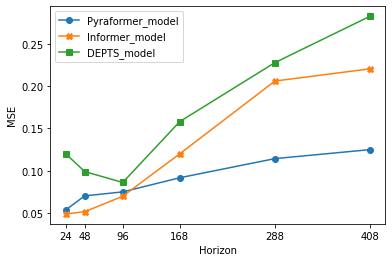

In [16]:
plt.plot(horizon,mse_pyra_new,marker='o',label="Pyraformer_model")
plt.plot(horizon,mse_inf_new,marker='X',label="Informer_model")
plt.plot(horizon,mse_depts_new,marker='s',label="DEPTS_model")
plt.xticks(horizon)
plt.xlabel("Horizon")
plt.ylabel("MSE")
plt.legend()
#plt.savefig("mse_vs_horizon_new_data.pdf",bbox_inches="tight")